# **Project Name - Netflix Movies and TV Shows Clustering**

##### **Project Type**    - Unsupervised Machine Learning (Clustering)
##### **Contribution**    - Individual

# **Project Summary**

Write project summary here...

# **GitHub Link**

Paste your github link here...

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

This dataset consist of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that number of TV Shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV Shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external dataset such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

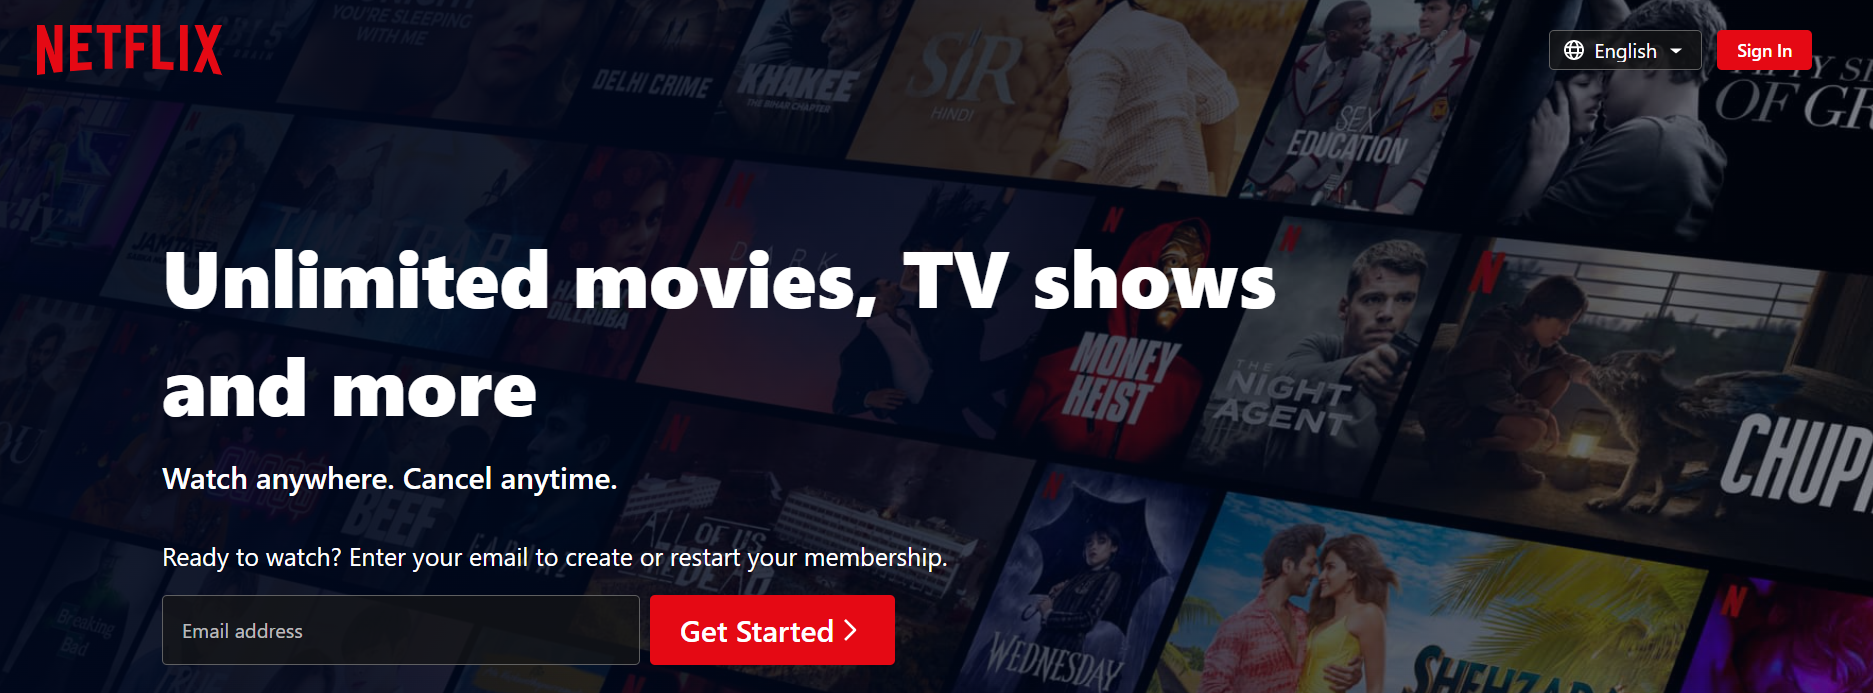

**Data Description**

**The dataset is collected from Flixable which is a third-party search engine of Netflix. The dataset consist of the information of the Movies and TV Shows available on Netflix as of 2019**


**Attribute Information:**

* show_id - Unique ID for every Movie / Tv Show
* type - A Movie or TV Show
* title - Title of movie/show
* director - Director of the show
* cast - Actors involved
* country - Country of production
* date_added - Date it was added on Netflix
* release_year - Actual release year of the show
* rating - TV ratings of the show
* duration - Total duration in minutes or number of seasons
* listed_in - Genre
* description - The summary description

# ***Let's Begin !***

## Importing Libraries

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# Importing sklearn libraries

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Mounting Drive and Loading Dataset

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset
working_dir = '/content/drive/MyDrive/Almabetter/Capstone Projects/Netflix Movies and TV Shows Clustering - Anas Malik/dat/'
dataset = pd.read_csv(working_dir + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Data Inspection

## Dataset Rows & Columns

In [ ]:
# Shape of the dataset
dataset.shape

(7787, 12)

## Dataset First View

In [ ]:
# viewing top 5 rows
dataset.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Dataset Information

In [ ]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Duplicate Values

In [ ]:
# duplicated rows in the dataset
dataset.duplicated().sum()

0

## Missing Values/Null Values

In [ ]:
# Missing values count
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

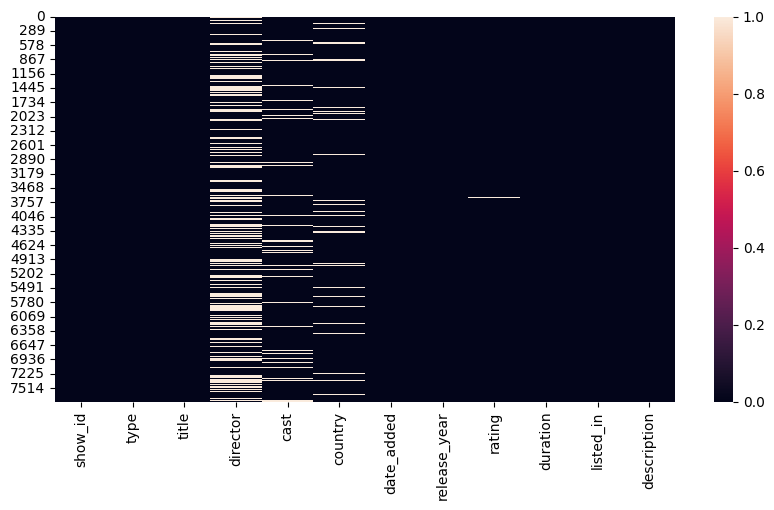

In [ ]:
# Visualizing the null values by plotting heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.isnull())

## What did I understand about the Dataset ?

The given dataset is collected from Flixable which is a third-party search engine of Netflix. The dataset consist of the information of TV Shows and Movies available on Netflix as of 2019. We need to perform clustering.

The given dataset has 7787 rows and 12 columns. There is no duplicated entry. There are some columns which consist of missing values.

## Understanding Variables/Features

In [ ]:
# Columns in the dataset
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Description
dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Features Description

* **show_id** - Unique ID for every Movie / Tv Show (Categorical)
* **type** - A Movie or TV Show (Categorical)
* **title** - Title of movie/show (Categorical)
* **director** - Director of the show (Categorical)
* **cast** - Actors involved (Categorical)
* **country** - Country of production (Categorical)
* **date_added** - Date it was added on Netflix (Categorical)
* **release_year** - Actual release year of the show (Numerical)
* **rating** - TV ratings of the show (Categorical)
* **duration** - Total duration in minutes or number of seasons (Categorical)
* **listed_in** - Genre (Categorical)
* **description** - The summary description (Categorical)

**There is no target variable.**

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"No. of unique values in {i} is {dataset[i].nunique()}")

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


# Data Wrangling/Data Cleaning

## Copy of Dataset

In [4]:
# creating a copy of dataset
df = dataset.copy()

In [5]:
# shape of dataset
df.shape

(7787, 12)

## Dropping Irrelevant Columns

In [6]:
# Dropping irrelevant columns
df.drop(columns=['show_id'], axis=1, inplace=True)

In [7]:
# shape of dataset
df.shape

(7787, 11)

## Handling Missing Values

In [8]:
def missing_values_info(data):
  '''
  This function returns the information about the missing values of a dataset
  '''
  column_names = data.columns
  missing_values = data.isnull().sum()
  missing_values_percent = round((data.isnull().sum()/data.shape[0])*100, 2)
  dataframe = pd.DataFrame({'columns': column_names,
                            'Null Values': missing_values.values,
                            'Null Values (%)': missing_values_percent})
  return dataframe.set_index('columns').sort_values('Null Values (%)', ascending=False)

In [9]:
# Missing values summary
missing_values_info(df)

,Null Values,Null Values (%)
columns,,
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09
type,0,0.00
title,0,0.00
release_year,0,0.00
duration,0,0.00


* **director** column has 30.7 % NaN values.
* **cast** column has 9 % NaN values.
* **country, date_added and rating** columns also have NaN values.


**Since director and cast columns have so many null values and these two columns does not contribute that much to clustering so I will drop them.**

In [10]:
# dropping irrelevant columns
df.drop(['director', 'cast'], axis=1, inplace=True)

**date_added is a sensitive column as it is related to date of movie added on Netflix and there are only 10 observations where date_added contains NaN value. So, I will drop these 10 observations.**

In [11]:
# shape before dropping
df.shape

(7787, 9)

In [13]:
# dropping obervations where date_added have NaN values
df.dropna(subset=['date_added'], inplace=True)

In [14]:
# shape after dropping
df.shape

(7777, 9)

**country and rating both columns are categorical in nature so I will replace NaN values with thier respective mode value.**

In [15]:
print(f"Mode value of country column: {df['country'].mode()[0]}")
print(f"Mode value of rating column: {df['rating'].mode()[0]}")

Mode value of country column: United States
Mode value of rating column: TV-MA


In [16]:
# replacing NaN values with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [17]:
# Missing value count
df.isnull().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<Axes: >

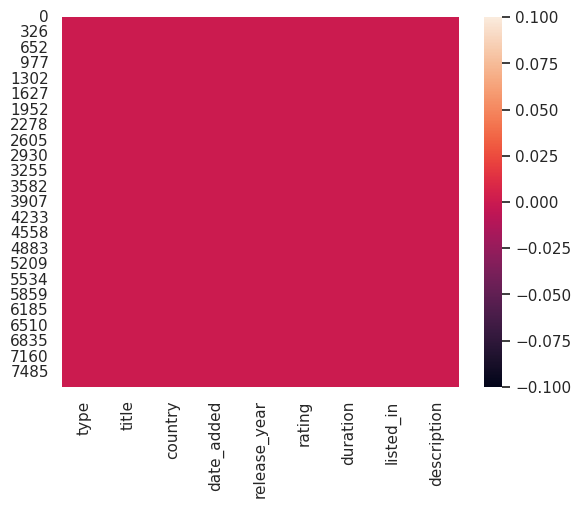

In [18]:
# visualizing missing value using heatmap
sns.heatmap(df.isnull())

**There are no more null values present in the dataset. So we can move forward.**

# Exploratory Data Analysis

**What is EDA?**

* **Exploratory Data Analysis(EDA), is one of the technique to extract vital features or treds that can be used by machine learning and deep learning models.**

**Why we perform EDA?**

* **We need to perform EDA to get prior understanding of the given dataset before making any assumptions. It also help us to understand the relatioship between dependent and independent variables.**

**Q1. When did the Netflix started growing ?**

In [ ]:
# release_year value counts
df['release_year'].value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

**There are so many years which have only one value, hence I am only considering the year from 1990.**

In [ ]:
# movies released after 2000
growth_year = df[df['release_year'] > 2000]

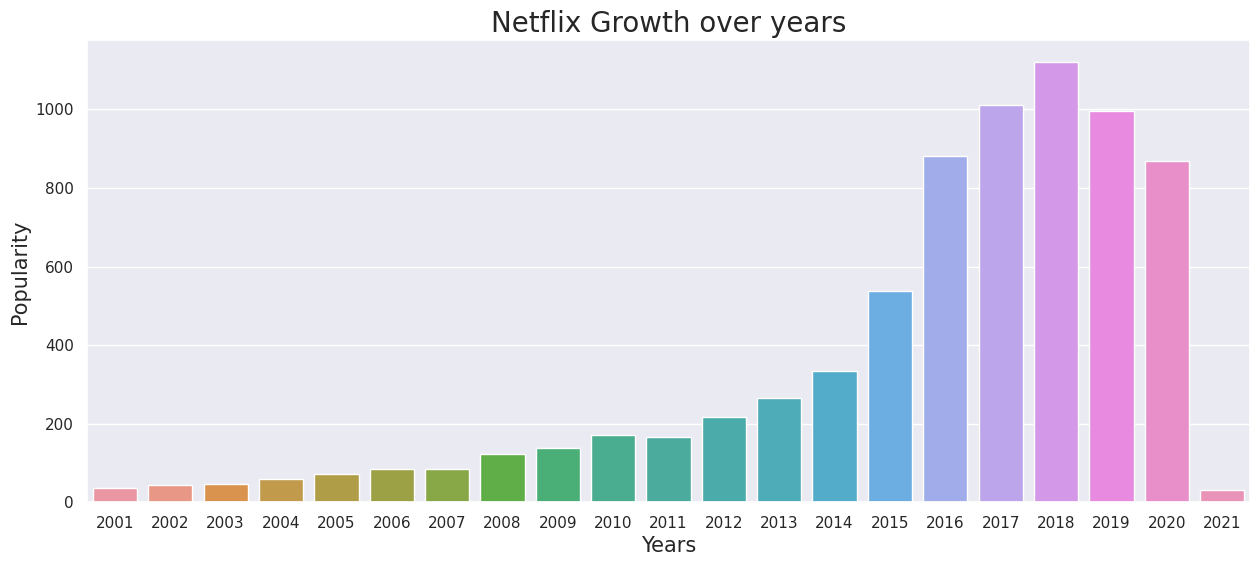

In [ ]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=growth_year, x='release_year')
plt.title("Netflix Growth over years", size=20)
plt.xlabel("Years", size=15)
plt.ylabel("Popularity", size=15)
plt.show()

**Obervation from above graph:**
*****
* Netflix started becomming popular after 2008.
* After 2015, it get a boost in it's growth.
* Now we all know that Netflix is one of the most famous OTT platform.

**Q2. What type of content people watching on Netflix over years ?**

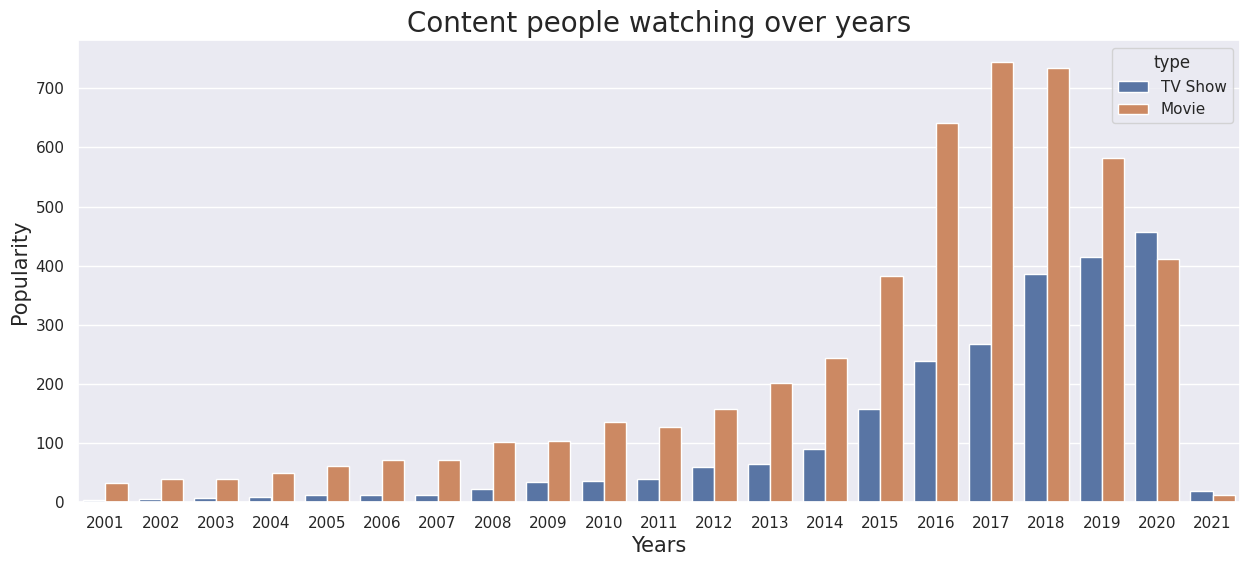

In [ ]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=growth_year, x='release_year', hue='type')
plt.title("Content people watching over years", size=20)
plt.xlabel("Years", size=15)
plt.ylabel("Popularity", size=15)
plt.show()

**Observation from above graph:**
****
* When Netflix is less popular, people prefer to watch only movies.
* After 2008, few people started watching TV Shows but still majority of people prefer Movies.
* After 2018, people prefer to watch both TV Shows and Movies.
* After pandemic (2020), people prefer to watch TV Shows over Movies.
* Now we all know that, most of the people prefer to watch TV Shows.

**Q3. What is the duration of Movies and TV Shows ?**

In [ ]:
# movies
movies = df[df['type'] == 'Movie']['duration'].str.replace('min', '').astype('int64')

# tv shows
tv_shows = df[df['type'] == 'TV Show']['duration'].value_counts().reset_index().rename(columns={'index': 'No of seasons', 'duration': 'count'})

**Duration of Movies**

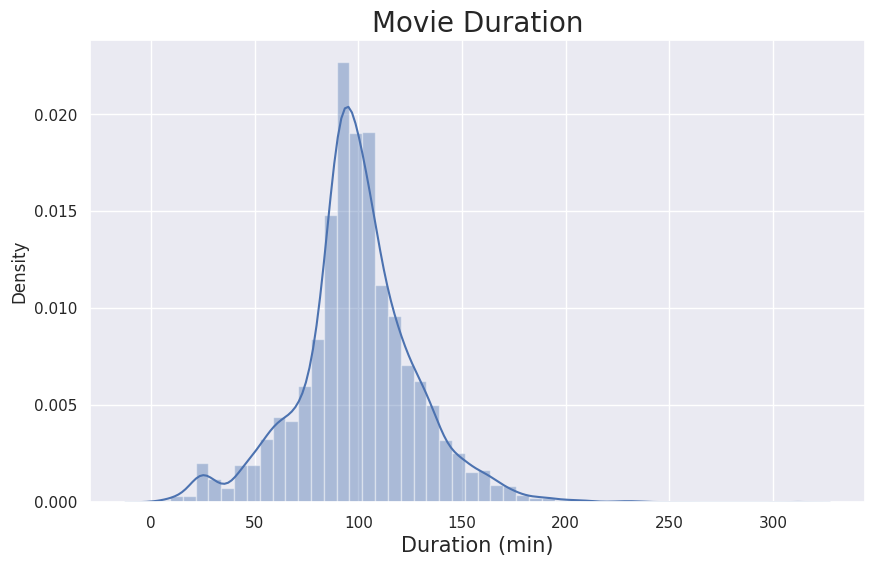

In [ ]:
# setting the figure size
plt.figure(figsize=(10, 6))

# visualizing distribution plot
sns.distplot(movies)
plt.title("Movie Duration", size=20)
plt.xlabel("Duration (min)", size=15)
plt.show()

**Observation from above graph:**
****
* Most number of movie's duration is in between 70 to 120 min.
* Long and short duration movies are less in number.

**Duration of TV Shows**

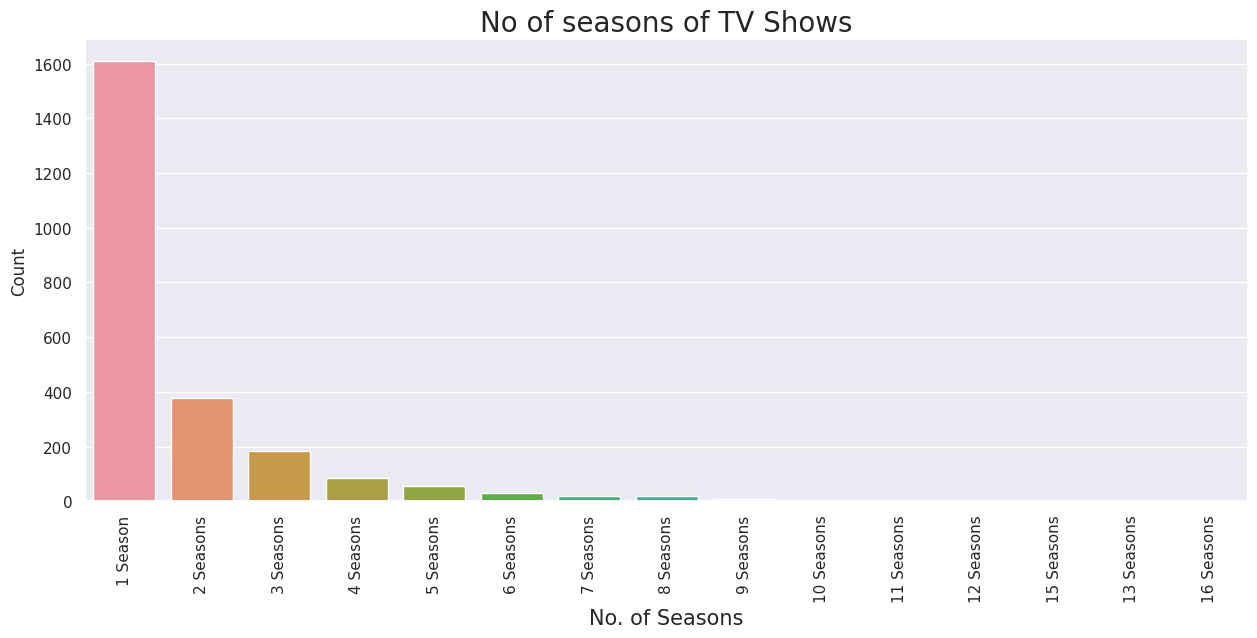

In [ ]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot plot
sns.barplot(data=tv_shows, x='No of seasons', y='count')
plt.title("No of seasons of TV Shows", size=20)
plt.xlabel("No. of Seasons", size=15)
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()

**Observation from above graph:**
****
* Most of the TV Shows have only 1 & 2 seasons.
* There are very few TV Shows who have more than 5 seasons.

**Q4. Which countries are contributing to Netflix ?**

In [20]:
def country_contribution_summary(data):
  '''
  This function returns the summary on contribution of countries
  '''
  # creating three empty list
  countries_lst = []
  tv_shows_lst = []
  movies_lst = []

  # appending country name to above lists accordingly
  for i in range(data.shape[0]):
    country = data['country'].iloc[i].split(',')
    for j in country:
      countries_lst.append(j.strip())
      if data['type'].iloc[i] == 'TV Show':
        tv_shows_lst.append(j.strip())
      elif data['type'].iloc[i] == 'Movie':
        movies_lst.append(j.strip())

  # creating a summary by counting the number of occurences
  summary = list(set([(i, countries_lst.count(i), tv_shows_lst.count(i), movies_lst.count(i)) for i in countries_lst]))
  return pd.DataFrame(summary, columns=['country', 'total_content', 'tv_shows', 'movies'])

In [21]:
# country contribution summary
country_df = country_contribution_summary(df)
country_df = country_df.sort_values('total_content', ascending=False).reset_index().drop('index', axis=1)
country_df.head()

,country,total_content,tv_shows,movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


**Total content contribution by top 10 countries.**

In [22]:
# top 10 countries contribution to netflix
top_10_countries = country_df.head(10)

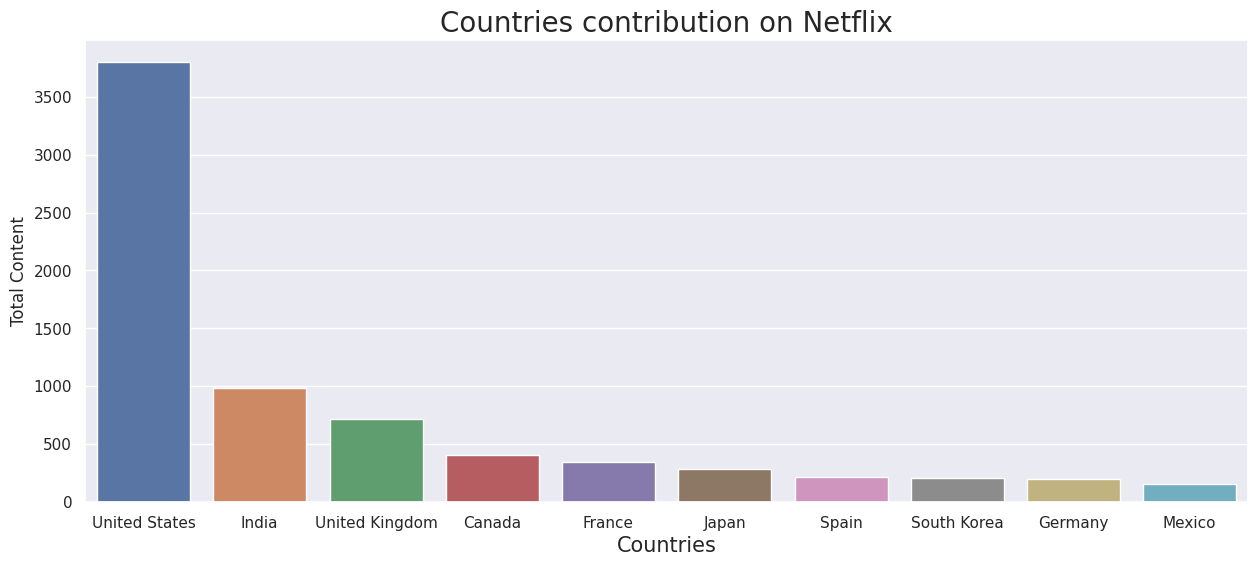

In [23]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot plot
sns.barplot(data=top_10_countries, x='country', y='total_content')
plt.title("Countries contribution on Netflix", size=20)
plt.xlabel("Countries", size=15)
plt.ylabel("Total Content")
plt.show()

**Observation from above graph:**
****
* Among all of the countries, United States is contributing most number of content to Netflix.
* After United States, India, United Kingdom, canada and France are other countries which are contributing more content to Netflix.

**Movies & TV Shows contribution by top 10 countries.**

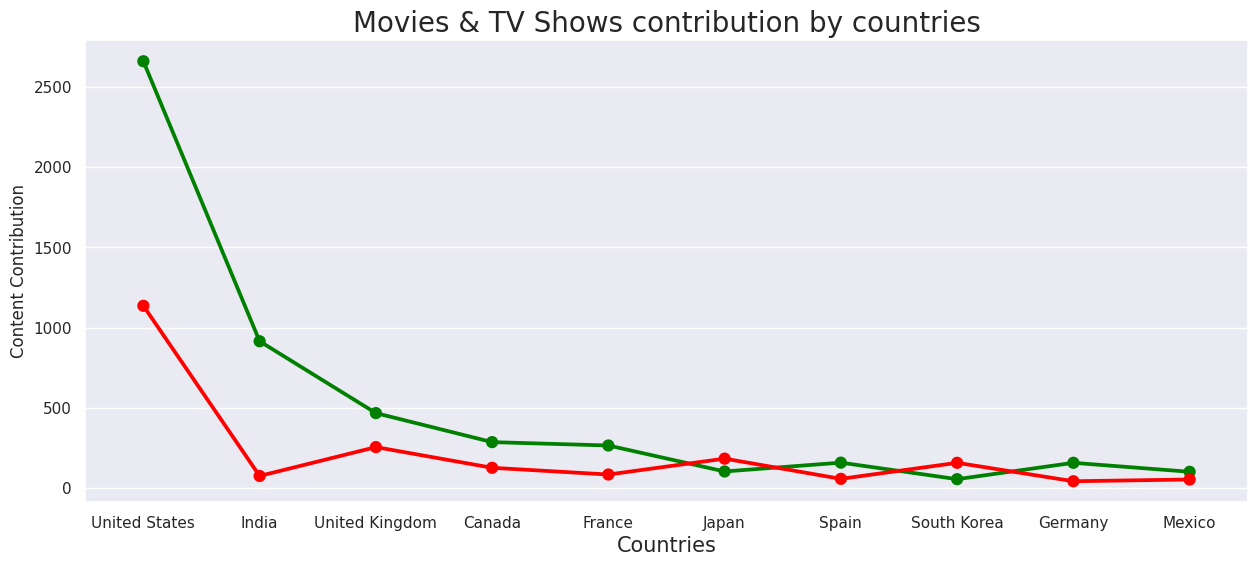

In [24]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing pointplot plot
sns.pointplot(data=top_10_countries, x='country', y='movies', color='green')
sns.pointplot(data=top_10_countries, x='country', y='tv_shows', color='red')
plt.title("Movies & TV Shows contribution by countries", size=20)
plt.xlabel("Countries", size=15)
plt.ylabel("Content Contribution")
plt.show()

**Observation from above graph:**
****
* Most number of movies and Tv shows are contributed by United States.
* India is contributing more number of movies and less number of TV Shows.
* Every country is contributing more number of movies than TV Shows except Japan and South Korea. 

**Q5. What are the ratings of Movies and TV Shows ?**

In [32]:
# Movies
movies = df[df['type'] == 'Movie']['rating'].reset_index().drop('index', axis=1)

# TV Shows
tv_shows = df[df['type'] == 'TV Show']['rating'].reset_index().drop('index', axis=1)

**Movies ratings**

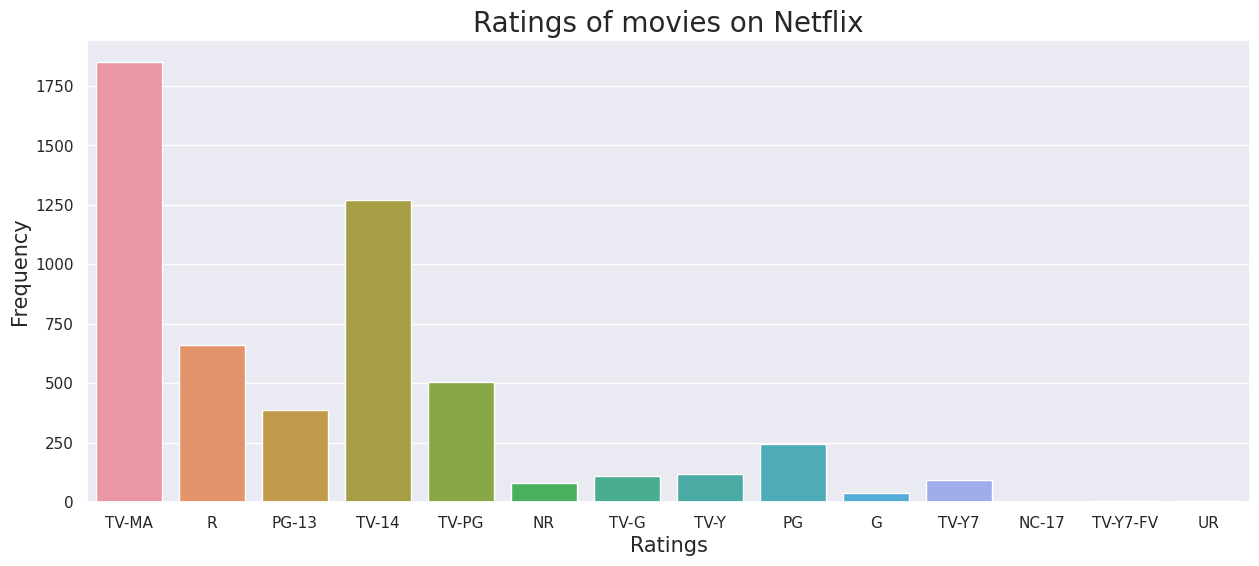

In [35]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot plot
sns.countplot(data=movies, x='rating')
plt.title("Ratings of movies on Netflix", size=20)
plt.xlabel("Ratings", size=15)
plt.ylabel("Frequency", size=15)
plt.show()

**TV Shows ratings**

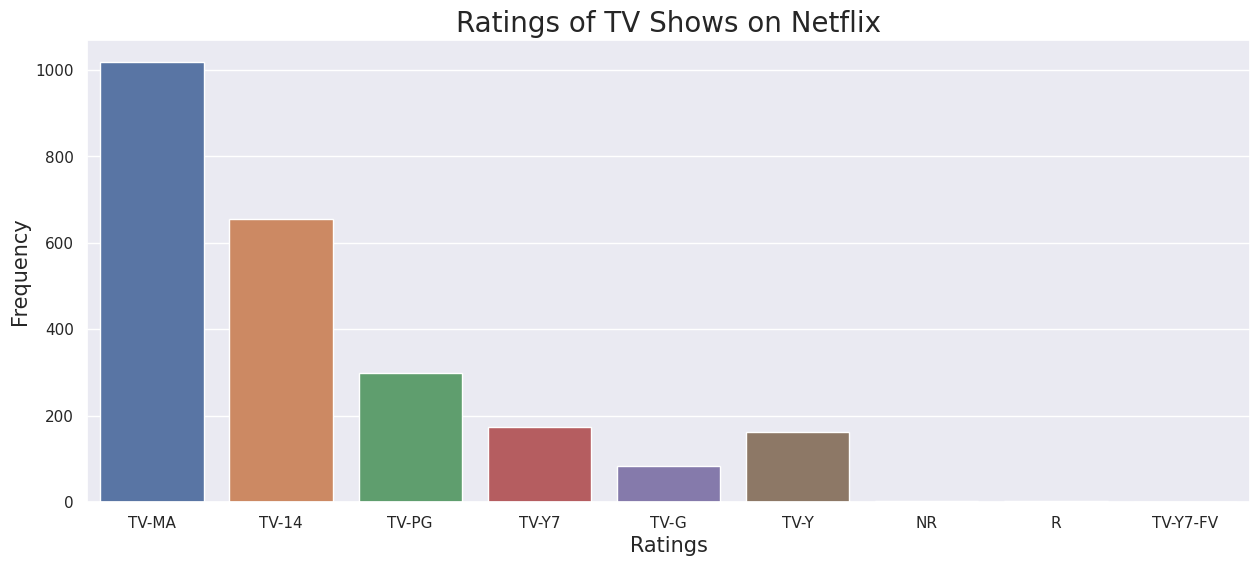

In [36]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot plot
sns.countplot(data=tv_shows, x='rating')
plt.title("Ratings of TV Shows on Netflix", size=20)
plt.xlabel("Ratings", size=15)
plt.ylabel("Frequency", size=15)
plt.show()

**Full form of ratings:**
****
* TV-MA ---> Mature Audience.
* TV-14 ---> Audience above 14 years.
* TV-PG ---> Parental Guidance Suggested.
* PG-13 ---> Parents Strongly Cautioned.
* TV-G ---> General Audience.
* R ---> Restricted.

**Observations from above two graphs:**
****
* Majority of the Movies & TV Shows on netflix are for mature audience.
* Then most of the Movies and TV Shows are for audience above 14 years old.
* Then there are Movies and TV Shows which are to be watched under parental guidance.
* There are some movies which are restricted.
* Overall, I can say that Netflix is more for adult audience and not suitable for kids or children under 18.

**Q6. What are the genres of Movies and TV Shows on Netflix ?**

In [55]:
def genre_summary(data):
  '''
  This function returns the genres of movies and tv shows
  '''
  # creating an empty dictionary
  genre_dict = {}

  # getting the genres
  for i in range(data.shape[0]):
    genres = data['listed_in'].iloc[i].split(', ')
    for j in genres:
      if j in genre_dict:
        genre_dict[j] += 1
      else:
        genre_dict[j] = 1

  # creating two empty lists
  genre_lst = []
  occurence_lst = []

  # getting genres and their occurence
  for i, j in genre_dict.items():
    genre_lst.append(i)
    occurence_lst.append(j)
  
  return pd.DataFrame({'genres': genre_lst, 'count': occurence_lst}).sort_values('count', ascending=False).reset_index().drop('index', axis=1)

In [49]:
# movies
movies_data = df[df['type'] == 'Movie']

# Tv Shows
tv_shows_data = df[df['type'] == 'TV Show']

In [56]:
# Movies genres
movie_genres = genre_summary(movies_data)

# TV Shows genres
tv_shows_genres = genre_summary(tv_shows_data)

**Top 10 genres of movies on Netflix**

In [59]:
# top 10 movies genres
top_10_movie_genres = movie_genres.head(10)

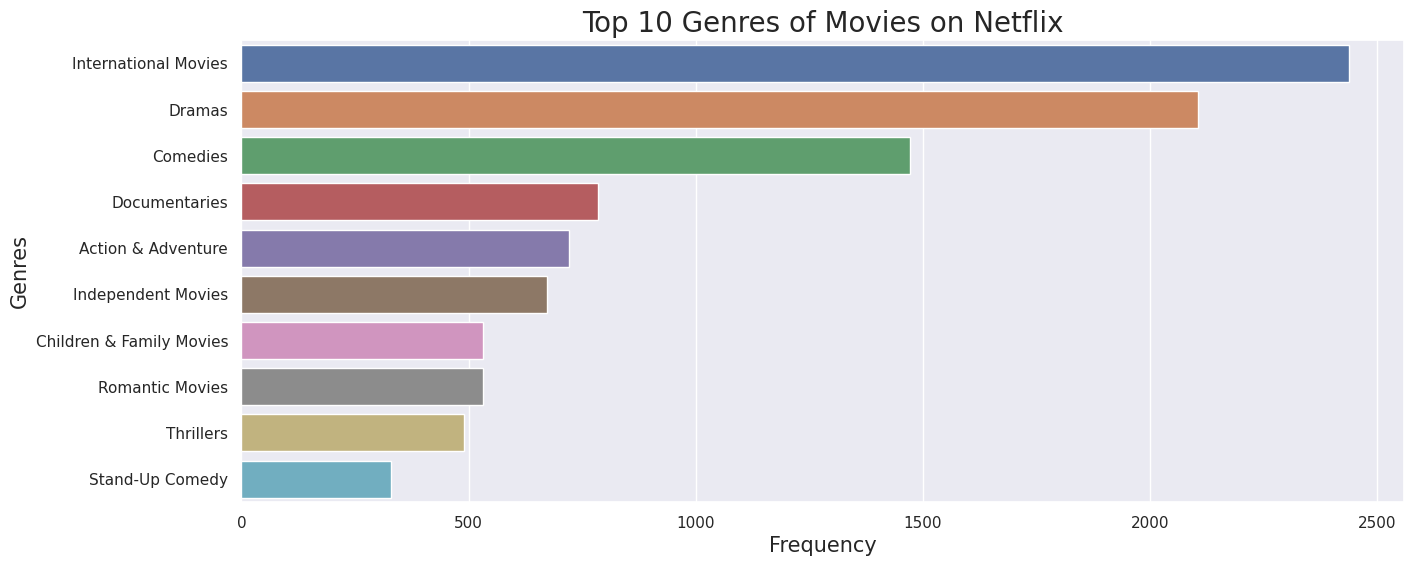

In [64]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot
sns.barplot(data=top_10_movie_genres, y='genres', x='count')
plt.title("Top 10 Genres of Movies on Netflix", size=20)
plt.xlabel("Frequency", size=15)
plt.ylabel("Genres", size=15)
plt.show()

**Observations from above graph:**
****
* Majority of the movies are international movies.
* Then most of the movies are Dramas, Comedies, Documentaries, Action & Adventure, Thrillers and Romantic movies.

**Top 10 genres of TV Shows on Netflix**

In [66]:
# top 10 tv shows genres
top_10_tv_shows_genres = tv_shows_genres.head(10)

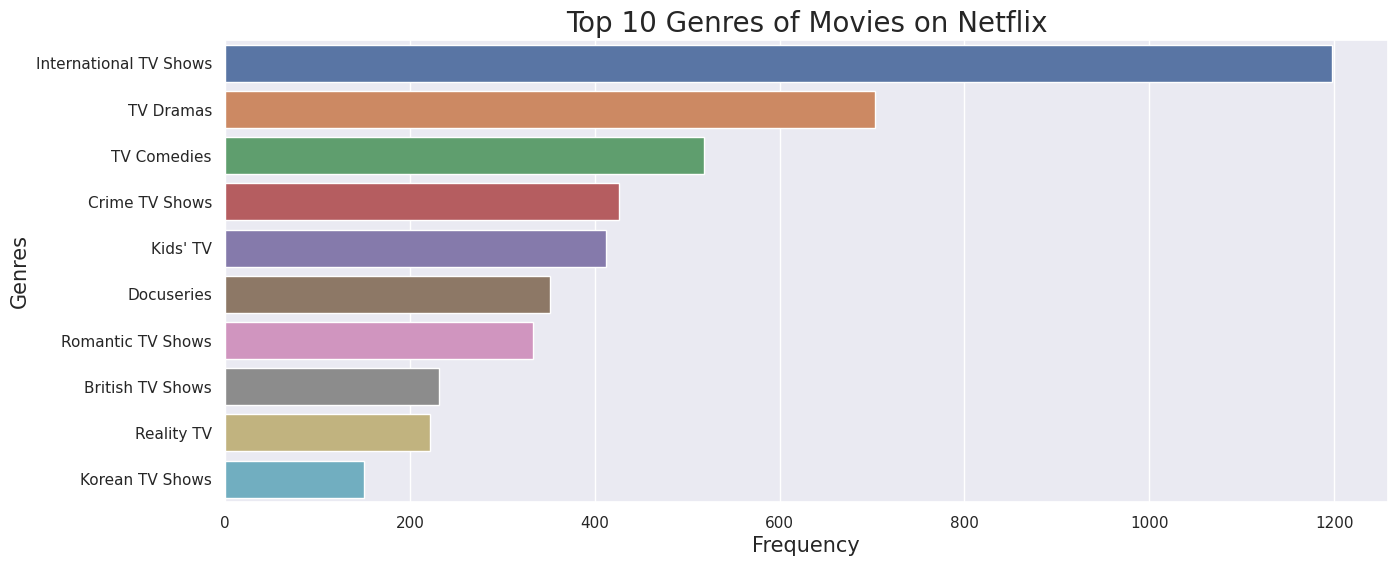

In [67]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot
sns.barplot(data=top_10_tv_shows_genres, y='genres', x='count')
plt.title("Top 10 Genres of Movies on Netflix", size=20)
plt.xlabel("Frequency", size=15)
plt.ylabel("Genres", size=15)
plt.show()

**Observation from above graph:**
****
* Majority of the Shows are international shows.
* Then most of the tv shows are dramas, comedies, crime, Kid's TV, Romantic and Reality Shows.

**Q7. In which month does most of the movies and tv shows added on Netflix ?**

In [86]:
# importing datetime
import datetime as dt

# creating a new column month_added
df['month_added'] = pd.to_datetime(df['date_added']).dt.month_name()

In [87]:
df['month_added'].unique()

array(['August', 'December', 'November', 'January', 'July', 'June',
       'April', 'October', 'May', 'March', 'September', 'February'],
      dtype=object)

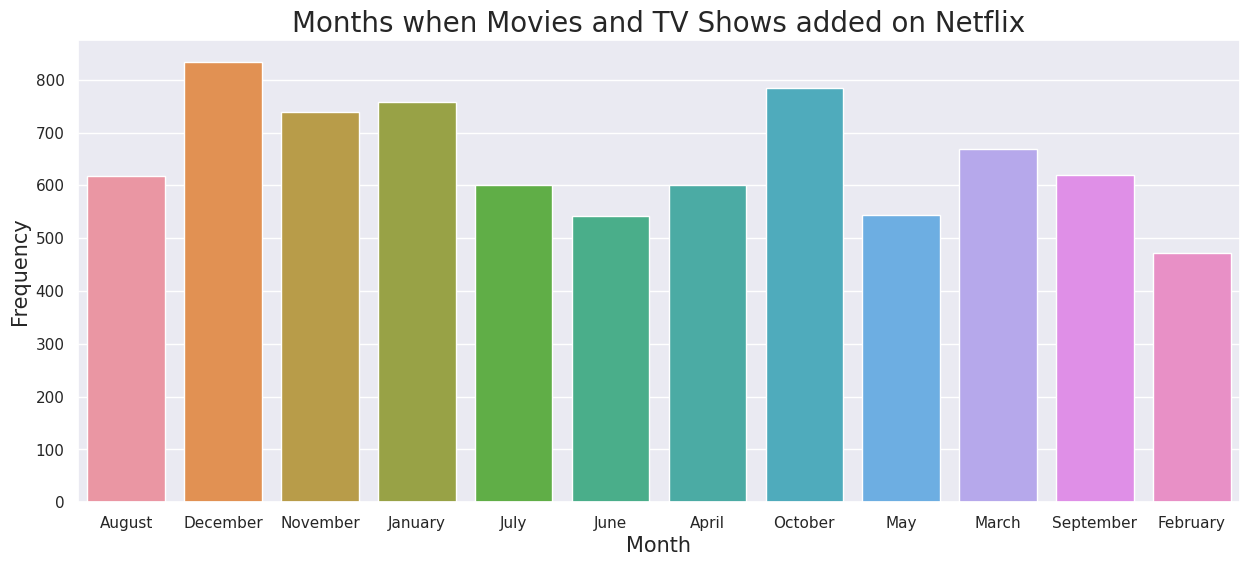

In [89]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=df, x='month_added')
plt.title("Months when Movies and TV Shows added on Netflix", size=20)
plt.xlabel("Month", size=15)
plt.ylabel("Frequency", size=15)
plt.show()

**Observation from the above graph:**
****
* Majority of the movies and TV Shows are added in the month of December because of the month of christmas which is a great festival for western countries.
* Other than December, every month movies and TV Shows are added on Netflix.

**Q8.  What are the type of content available on Netflix ?**

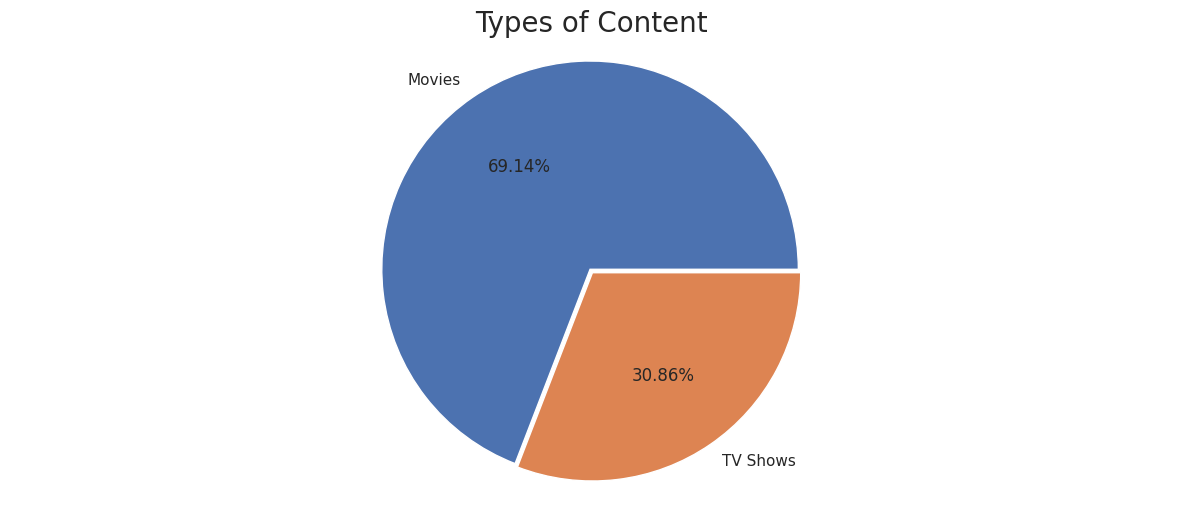

In [94]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing pie chart
plt.pie(df['type'].value_counts(), labels=['Movies', 'TV Shows'], explode=[0.01, 0.01], autopct='%1.2f%%')
plt.title("Types of Content", size=20)
plt.axis('equal')
plt.show()

**Observations from above pie chart:**
****
* There are two types of content available on Netflix ,i.e., Movies and TV Shows.
* Movies are more in numbers than TV Shows.
* Movies are 69.14 % while TV Shows are 30.86 %.

**Q9. What are the commons words in the title ?**

In [99]:
# importing libraries
from wordcloud import WordCloud, STOPWORDS

In [96]:
# movies
movies_df = df[df['type'] == 'Movie']

# tv shows
tv_shows_df = df[df['type'] == 'TV Show']

**Common words in Movie's title**

In [97]:
# getting words in the title of movies
word_cloud_df = movies_df['title']
words_in_title = ' '.join(word for word in word_cloud_df)

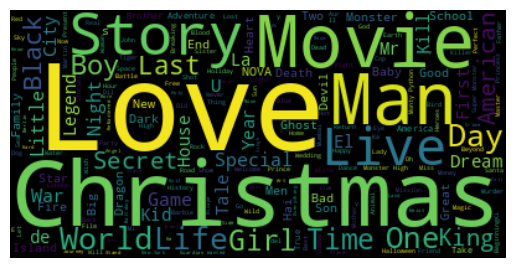

In [100]:
# stopwords
stop_words = set(STOPWORDS)

# Generating wordcloud image
wordcloud = WordCloud(stopwords=stop_words, background_color='black').generate(words_in_title)

# visualizing wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observations from above image:**
****
In movies, words like Love, Christmas, Story, World, Live, Day are very common.

**Common words in TV Show's title**

In [101]:
# getting words in the title of tv shows
word_cloud_df = tv_shows_df['title']
words_in_title = ' '.join(word for word in word_cloud_df)

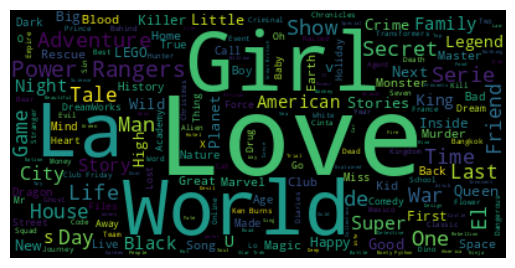

In [102]:
# stopwords
stop_words = set(STOPWORDS)

# Generating wordcloud image
wordcloud = WordCloud(stopwords=stop_words, background_color='black').generate(words_in_title)

# visualizing wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observation from above image:**
****
In Tv Shows, words like Love, Girl, World, La, Stories, Tale are very common.

# Data Pre-processing